In [1]:
"""
OBJETIVO : Realizar pruebas manuales con los mejores modelos escogidos, 
            de esta forma analizaar su comportamiento con conjunto de datos
            personalizados.
            
"""

'\nOBJETIVO : Realizar pruebas manuales con los mejores modelos escogidos, \n            de esta forma analizaar su comportamiento con conjunto de datos\n            personalizados.\n            \n'

In [2]:
#Manejo de Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox


#Machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

#Librerias estandar (Extras)
import re
import os
import time
import random
from datetime import datetime
import glob

In [3]:
"""
DEFINIMOS EL PATH DEL PROYECTO 
"""
with open('../../path_base.txt') as f:
    path_base = f.read()
path_base

'C:/Users/Shounen/Desktop/Ciclo XI/Tesis 2/NewTesis'

In [4]:
"""
VARIABLES GENERALES
"""

path_imagenes = 'F:/GOES/'      

products = ['C07','C08','C13']
times   = ['10','20','30','40','50','00']

In [5]:
def crearModelo2D(p,run):    
    # Imagen
    input_1 = tf.keras.layers.Input(shape=(p['margen'][run],p['margen'][run],p['canales'][run]))
    
    # Convulutional layers
    rescaling = tf.keras.layers.Rescaling(1./65536)(input_1)
    conv2d_1 = tf.keras.layers.Conv2D(128, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(rescaling)
    mxPool_1 = tf.keras.layers.MaxPooling2D()(conv2d_1)
    dropout_1  = tf.keras.layers.Dropout(0.2)(mxPool_1)
    
    conv2d_2 = tf.keras.layers.Conv2D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    mxPool_2 = tf.keras.layers.MaxPooling2D()(conv2d_2)
    dropout_2  = tf.keras.layers.Dropout(0.1)(mxPool_2)
    
    #conv2d_3 = tf.keras.layers.Conv2D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    #mxPool_3 = tf.keras.layers.MaxPooling2D()(conv2d_3)
    #dropout_3  = tf.keras.layers.Dropout(0.2)(mxPool_3)
    
    #conv2d_4 = tf.keras.layers.Conv2D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_3)
    #mxPool_4 = tf.keras.layers.MaxPooling2D()(conv2d_4)
    #dropout_4  = tf.keras.layers.Dropout(0.2)(mxPool_4)
    
    conv2d_5 = tf.keras.layers.Conv2D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_2)
    
    
    # Flatten layer :
    flatten = tf.keras.layers.Flatten()(conv2d_5)
    
    final = flatten
    listConcat = [flatten]
    listInputs = [input_1]
    
    if len(p['inputs'])>1:
        #Agregamos los otros atrbutos        
        for attr in p['inputs'][1:]:
            # The other input
            input_x = tf.keras.layers.Input(shape=(1,))
            listConcat.append(input_x)
            listInputs.append(input_x)

            
        # Concatenate
        final = tf.keras.layers.Concatenate()(listConcat)
        
    dense_1 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(final)
    #dense_2 = tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu)(dense_1)
    dense_3 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(dense_1)
    
        
    # output
    if p['redTipo'] == 'regresion':
        output = tf.keras.layers.Dense(units=1)(dense_3)
        dimOutput = 1
    elif p['redTipo'] == 'clasificacion':
        output = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(dense_3)#units=1, activation=tf.keras.activations.relu)(dense_3)
        dimOutput = 2
    else:
        print(f"No se pudo crear el modelo outputs no esta bien definido {p['redTipo']}")
        return -1      
    

    full_model = tf.keras.Model(inputs=listInputs, outputs=[output])
        
    #print(full_model.summary())
    return full_model

In [6]:
def crearModelo3D(p,run):        
    # Imagen
    input_1 = tf.keras.layers.Input(shape=(p['tiempos'][run],p['margen'][run],p['margen'][run],p['canales'][run]))
    
    # Convulutional layers
    rescaling = tf.keras.layers.Rescaling(1./65536)(input_1)
    conv3d_1 = tf.keras.layers.Conv3D(128, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(rescaling)
    #mxPool_1 = tf.keras.layers.MaxPooling3D()(conv3d_1)
    dropout_1  = tf.keras.layers.Dropout(0.2)(conv3d_1)
    
    conv3d_2 = tf.keras.layers.Conv3D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    mxPool_2 = tf.keras.layers.MaxPooling3D()(conv3d_2)
    dropout_2  = tf.keras.layers.Dropout(0.1)(mxPool_2)
    
    #conv2d_3 = tf.keras.layers.Conv3D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_1)
    #mxPool_3 = tf.keras.layers.MaxPooling3D()(conv2d_3)
    #dropout_3  = tf.keras.layers.Dropout(0.2)(mxPool_3)
    
    #conv2d_4 = tf.keras.layers.Conv3D(64, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_3)
    #mxPool_4 = tf.keras.layers.MaxPooling3D()(conv2d_4)
    #dropout_4  = tf.keras.layers.Dropout(0.2)(mxPool_4)
    
    conv3d_5 = tf.keras.layers.Conv3D(32, kernel_size=3,padding='same',activation=tf.keras.activations.relu)(dropout_2)
    
    
    # Flatten layer :
    flatten = tf.keras.layers.Flatten()(conv3d_5)
    
    final = flatten
    listConcat = [flatten]
    listInputs = [input_1]
    
    if len(p['inputs'])>1:
        #Agregamos los otros atrbutos        
        for attr in p['inputs'][1:]:
            # The other input
            input_x = tf.keras.layers.Input(shape=(1,))
            listConcat.append(input_x)
            listInputs.append(input_x)

            
        # Concatenate
        final = tf.keras.layers.Concatenate()(listConcat)
        
    dense_1 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(final)
    #dense_2 = tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu)(dense_1)
    dense_3 = tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu)(dense_1)
    
        
    # output
    if p['redTipo'] == 'regresion':
        output = tf.keras.layers.Dense(units=1)(dense_3)
        dimOutput = 1
    elif p['redTipo'] == 'clasificacion':
        output = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(dense_3)#units=1, activation=tf.keras.activations.relu)(dense_3)
        dimOutput = 2
    else:
        print(f"No se pudo crear el modelo outputs no esta bien definido {p['redTipo']}")
        return -1      
    

    full_model = tf.keras.Model(inputs=listInputs, outputs=[output])
        
    #print(full_model.summary())
    return full_model

In [7]:
def crearModelo(params,run):    
    if params['meanMatrizImagen']:
        print(f"Creando modelo 2D")
        print(f"HP :(T:{params['tiempos'][run]} - M:{params['margen'][run]} - C:{params['canales'][run]}) y  tipo ({params['redTipo']})")
        modelo = crearModelo2D(params,run)
    else:
        print(f"Creando modelo 3D")
        print(f"HP :(T:{params['tiempos'][run]} - M:{params['margen'][run]} - C:{params['canales'][run]}) y  tipo ({params['redTipo']})")
        modelo = crearModelo3D(params,run)

    return modelo

In [8]:
#Transformamos un filename tensor en una imagen
def read_png_file(item, value, p,run, path_base, products, times):
    # imagenData[0] = XO     # imagenData[1] = XA     # imagenData[2] = Fecha
    imagenData = tf.strings.split(item['imagen'], sep='--')
    size = int(p['margen'][run] / 2)

    timeJoin = []
    for j in range(p['tiempos'][run]-1,-1,-1):
        filename = path_base + 'PNG/' + imagenData[2] + '/' + imagenData[2] + '_' + str(j) + '.png'
        
        image_string = tf.io.read_file(filename)

        img_decoded = tf.io.decode_png(image_string, dtype=tf.uint16, channels=3)
        
        
                
        timeJoin.insert(0,img_decoded[int(imagenData[1]) - size:int(imagenData[1]) + size,
                                      int(imagenData[0]) - size:int(imagenData[0]) + size,
                                      0:p['canales'][run]])
 
        
    if p['tiempos'][run]==1:
        imagenData = tf.reshape(timeJoin[0],(p['margen'][run],p['margen'][run],p['canales'][run]))
    else:
        if p['meanMatrizImagen']:        
            img = tf.reduce_mean( timeJoin , axis=0 )
            imagenData = tf.reshape(img,(p['margen'][run],p['margen'][run],p['canales'][run]))
        else:
            img = tf.stack(timeJoin, axis=0)
            imagenData = tf.reshape(img,(p['tiempos'][run],p['margen'][run],p['margen'][run],p['canales'][run]))
        
    
    
    if len(p['inputs']) == 1:
        return imagenData, int(value)
    
    item['imagen'] = imagenData
    itemL = []
    for inpL in p['inputs']:
        itemL.append(item[inpL])
    
    return tuple(itemL), int(value)

In [9]:
def evaluarModelo(dsPruebas,modelo, p_train):
    inputsList = {}
    for inp in p_train['inputs']:
        inputsList[inp] = dsPruebas[inp].tolist()       

    dsP = tf.data.Dataset.from_tensor_slices(((inputsList),dsPruebas[p_train['outputs']].tolist()))      
    dsP = dsP.map(lambda x ,y : read_png_file(x,y,p_train,0,path_imagenes,products,times))
    dsP = dsP.batch(p_train['batch'])#.prefetch(tf.data.AUTOTUNE)  
    
    hist = modelo.predict(dsP, verbose=1)
    
    return hist

In [10]:
# Buscamos el DS validacion
def getDataset(path_base, model, dsTipo, dirName):
    if 'CLASE' in model.upper():
        print(f'Se encontro dataset {dsTipo} para CLASE')
        if dsTipo == 'Entrenamiento':
            DAName = 'SplitConDA_V1' if '_DA' in dirName else 'SplitSinDA_V1'
            dsName =  dirName.split('\\')[-2]
            pruebasFile = f'{path_base}/Archivos/Dataset/Clasificacion/{dsTipo}/{DAName}/{dsName}.csv' # ClasV1
        else:
            pruebasFile = f'{path_base}/Archivos/Dataset/Clasificacion/{dsTipo}/ClaseV1_{dsTipo}DS.csv' # ClasV1
        inputs = ['imagen', 'dato']
        outputs = 'clase'

    elif 'EST' in model:
        print(f'Se encontro dataset {dsTipo} para EST')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_EST_{dsTipo}DS.csv' # Reg EST
        inputs = ['imagen']
        outputs = 'dato'

    elif 'DatoV1' in model:            
        print(f'Se encontro dataset {dsTipo} para DatoV1')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/DatoV1_{dsTipo}DS.csv' # Reg V1
        inputs = ['imagen']
        outputs = 'dato'
    
    elif 'Dato_V2' in model:
        print(f'Se encontro dataset {dsTipo} para Dato_V2')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_V2_{dsTipo}DS.csv' # Reg V2
        inputs = ['imagen']
        outputs = 'dato'
    
    elif 'Dato_V3' in model:
        print(f'Se encontro dataset {dsTipo} para Dato_V3')
        pruebasFile = f'{path_base}/Archivos/Dataset/Regresion/{dsTipo}/Dato_V3_{dsTipo}DS.csv' # Reg V3
        inputs = ['imagen']
        outputs = 'dato'
        

    else:
        print(f"NO SE PUDO ENCONTRAR DS VALIDACION PARA: {model}")
        return -1 
    
    return pruebasFile, inputs, outputs

In [11]:
def getMetrics(modelType, lr, paciencia):
    
    if modelType == 'clasificacion':    
        optimizer = keras.optimizers.Adam(learning_rate=lr) 
        
        #BinaryCrossentropy() #CategoricalCrossentropy()      
        loss_fn= keras.losses.BinaryCrossentropy()
        train_acc_metric = keras.metrics.BinaryCrossentropy()
        val_acc_metric = keras.metrics.BinaryCrossentropy()
        if paciencia:
            early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=paciencia, mode="max")  
 
        
        metrics = ['acc', keras.metrics.TruePositives(),
                         keras.metrics.TrueNegatives(),
                         keras.metrics.FalsePositives(),
                         keras.metrics.FalseNegatives()]
        

    elif modelType == 'regresion':
        optimizer = keras.optimizers.Adam(learning_rate=lr)
        loss_fn=keras.losses.MeanSquaredError()
        train_acc_metric = keras.metrics.MeanSquaredError()
        val_acc_metric = keras.metrics.MeanSquaredError()
        if paciencia:
            early_stopping = keras.callbacks.EarlyStopping(monitor="val_mse", patience=paciencia, mode="max")                                            
        metrics = ['mse']
        
        
    else:
        print('No se pudo crear las metricas')
        return -1    
         
        
    logs = Callback()
    callbacks = [logs]                     
    if paciencia:
        callbacks.append(early_stopping)
        
    metrics = {'optimizer': optimizer, 'loss_fn':loss_fn,'train_acc_metric': train_acc_metric,
               'val_acc_metric': val_acc_metric, 'metrics': metrics,'callbacks': callbacks}
    
    return metrics
        

In [12]:
def getModelbyID(path_base, idModel, dsTipo = 'Pruebas',inputs=['imagen', 'dato'], graficas=True, epoca=0):       
    
    # Buscamos el modelo en el path_base
    os.chdir(f'{path_base}/Archivos/Resultados/')
    listFiles = list(glob.glob('**/**/**/*.hdf5'))
    #print(f'Cantidad de modelos a buscar: {len(listFiles)}')          
    
    models = [x for x in listFiles if str(idModel) in x]
    if epoca: 
        
        models = [x for x in models if f'Model_{epoca}_' in x]
        if len(models)<1:
            print(f" No se encontro el modelo {idModel} para la epoca {epoca}")
            return
        
    if len(models) > 0:        
        
        redTipo = models[0].split('\\')[0]
        
        pruebasFile, inputs, outputs = getDataset(path_base, models[0], dsTipo, models[0])
                
        dsPruebas = pd.read_csv(pruebasFile)
        
        #print(f'INICIANDO PRUEBAS PARA MODELO {models[0]}')
        #print(f'Cantidad de pruebas : {len(dsPruebas)}')  

        # Buscamos sus parametros
        pathStats = f'{path_base}/Archivos/Reportes/Entrenamiento/{redTipo}/ReporteEstadisticas.csv'
        try:
            stats = pd.read_csv(pathStats)        
            modelStats = stats[stats['idModel']==idModel].iloc[0]
            #print(f'Estadisticas para modelo encontrado: Tipo {redTipo}')
        except:
            print('No se pudo encontrar el archivo de stats o leer el id del modelo en el archivo stats')
            print(f'Archivo leido : {pathStats}')
            return -1

        C = modelStats['C']  
        T = modelStats['T']
        M = modelStats['M']
        
        p_train = {         
                # Datos del modelo
              'redTipo'  : redTipo.lower(), 
              'inputs'   : inputs, 
              'meanMatrizImagen' : not modelStats['3D'], 
              'outputs'  : outputs, 
              'num_class': 2,

               # Hiper parametros 
              'canales'  : [int(C)],
              'tiempos'  : [int(T)],
              'margen'   : [int(M)],
              'runs'     : 1,
            
              # Entrenamiento
              'batch'    : 32,
              'lr'       : 0.001,
         }
                
        
        modelo = crearModelo(p_train,0)
        modelo.load_weights(models[0])        
        metricas = getMetrics(redTipo.lower(),p_train['lr'], 7)                
        modelo.compile(optimizer=metricas['optimizer'],loss=metricas['loss_fn'],metrics=metricas['metrics'],)        
        
        # Buscamos si se existe la evaluacion
        try:
            hist = pd.read_csv(f'{path_base}/Archivos/Reportes/Pruebas/{epoca}_{idModel}_{dsTipo}.csv')
            #hist = hist['valores'].tolist()            
        except:
            print("No se encontro resultados en reportes ...procediendo a generar resultados")
            hist = evaluarModelo(dsPruebas,modelo, p_train)            
            hist = pd.DataFrame({'valores': hist.flatten().tolist()})
            hist.to_csv(f'{path_base}/Archivos/Reportes/Pruebas/{epoca}_{idModel}_{dsTipo}.csv', index=False)
        
        
        if graficas:                       
            if redTipo.lower() == 'regresion':               
            
                # Dispersion de valores predichos
                plt.scatter(dsPruebas['dato'].tolist(), hist['valores'].tolist())
                plt.title('DISPERSION DE VALORES REALES VS PREDICHOS ')
                plt.xlabel('True Values ')
                plt.ylabel('Predictions Values')
                plt.show()

                #Errores
                error = np.array(hist['valores'].tolist()) - np.array(dsPruebas['dato'].tolist())
                plt.title('HISTOGRAMA DE ERROR VS CANTIDAD')
                plt.hist(error, bins = 25)
                plt.xlabel("Prediction Error [MPG]")
                plt.ylabel("COUNT")
                plt.show()


                # Grafico del dataset
                dsPruebas['dato'].hist(legend=True) 
                plt.xlabel('Valores')
                plt.ylabel('Cantidad')
                print('HISTOGRAMA DE DATASET USADO PARA PREDECIR')
                print(f'Cantidad total: {dsPruebas["dato"].count()}')
                print(f'Cantidad ceros: {dsPruebas[dsPruebas["dato"]==0]["dato"].count()}')
                plt.show()

                #Dispersion SeaBorn
                #dsPruebas['predicho'] = hist['valores'].tolist()
                #sns.lmplot(x='dato', y='predicho',data=dsPruebas )
            else:
                # Dispersion de valores predichos
                dsPruebas['valores'] = hist['valores'].tolist()
                _ds0 = dsPruebas[dsPruebas['clase']==0]
                _ds1 = dsPruebas[dsPruebas['clase']==1]
                
                plt.scatter(_ds0['dato'].tolist(), _ds0['valores'].tolist(), label='CLASE 0', c='r')
                plt.scatter(_ds1['dato'].tolist(), _ds1['valores'].tolist(), label='CLASE 1' , c = 'b')
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion (TOTAL) ')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()
                
                 # Dispersion de valores predichos (Clase0)
                dsPruebas['valores'] = hist['valores'].tolist()
                _ds0 = dsPruebas[dsPruebas['clase']==0]
                           
                plt.scatter(_ds0['dato'].tolist(), _ds0['valores'].tolist(), label='CLASE 0', c='r', alpha=0.2)             
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion CLASE 0')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()
                
                 # Dispersion de valores predichos (Clase1)
                dsPruebas['valores'] = hist['valores'].tolist() 
                _ds1 = dsPruebas[dsPruebas['clase']==1]
                          
                plt.scatter(_ds1['dato'].tolist(), _ds1['valores'].tolist(), label='CLASE 1', c='b',alpha=0.2)
                plt.legend()
                
                plt.title('DISPERSION DE Dato vs Prediccion CLASE 1')
                plt.xlabel('DATO')
                plt.ylabel('VALORES')
                #plt.xscale("log")   
                #plt.yscale("log") 
                plt.show()

        
        return modelo, p_train, hist, dsPruebas
        
    else:
        print(f'No se encontro el modelo con id {idModel} en la PC')
        return -1
    
    return -1

In [13]:
def testModels(path_base, dfModel, dsTipo='Validacion', verb = 5, graficas= True): 
    modeloResultado = []
    contador = 0
    start_time = time.time()
    print(f'Modelo a procesar: {len(dfModel)}')
    for i in dfModel.index:
        if not contador % verb:
            print(f'Se ha procesado {contador} modelos en %.5fs' %(time.time() - start_time))
            
        modeloResultado.append(getModelbyID(path_base,dfModel['idModel'][i],dsTipo=dsTipo,epoca=dfModel['epoca'][i],graficas=graficas))
        contador = contador + 1
        
    return modeloResultado    

In [46]:
%%time
listModels = testModels(path_base, dfModel, dsTipo='Validacion', verb = 5, graficas=False)

Modelo a procesar: 44
Se ha procesado 0 modelos en 0.00000s
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se ha procesado 5 modelos en 0.69742s
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
Se encontro dataset Validacion para CLASE
Crea

Modelo a procesar: 5
Se ha procesado 0 modelos en 0.00000s
Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


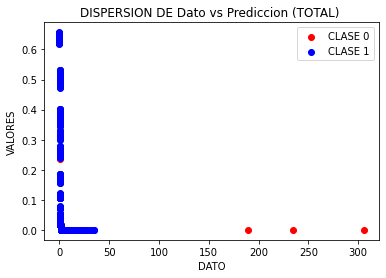

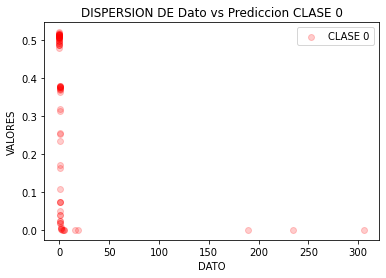

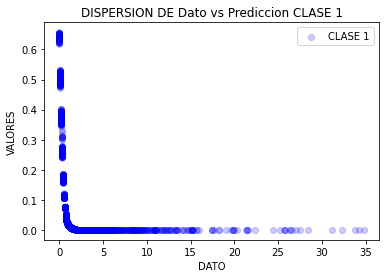

Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


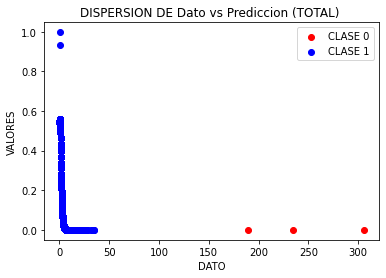

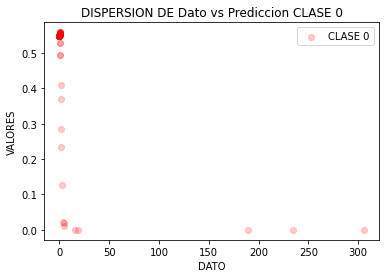

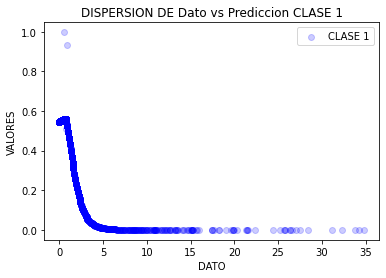

Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


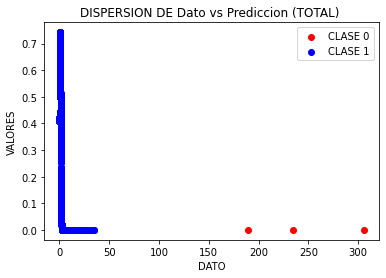

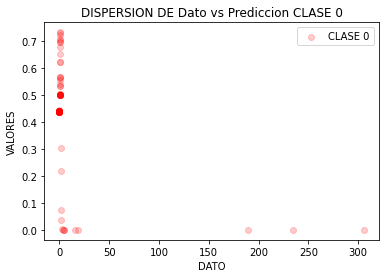

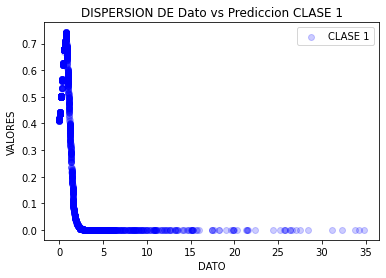

Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


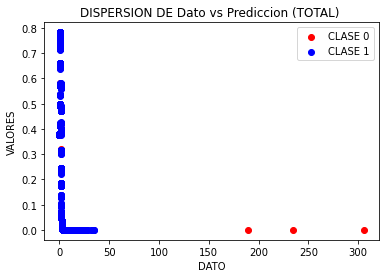

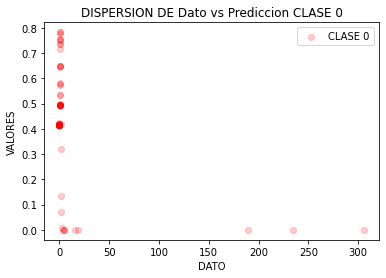

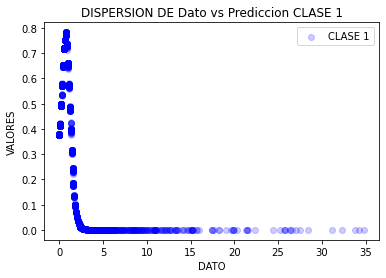

Se encontro dataset Validacion para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


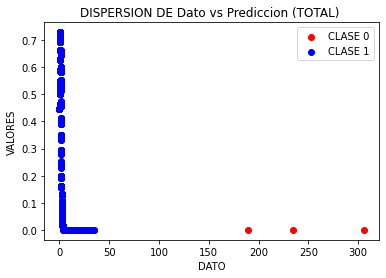

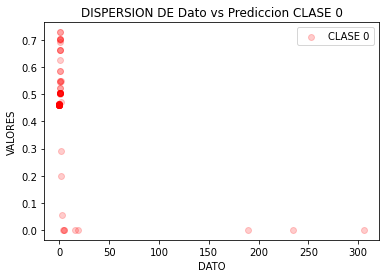

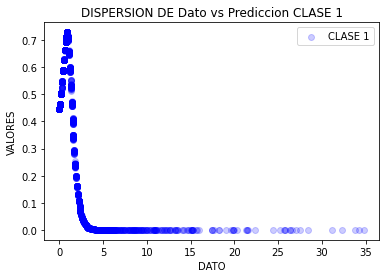

In [14]:
dfModel = pd.read_csv(f'{path_base}/Archivos/Reportes/Entrenamiento/Clasificacion/ReporteEstadisticas_CLAS3D_V4.csv')
#dfModel.head(2)
listModels = testModels(path_base, dfModel[:5], dsTipo='Validacion', verb = 5)

Modelo a procesar: 5
Se ha procesado 0 modelos en 0.00000s
Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


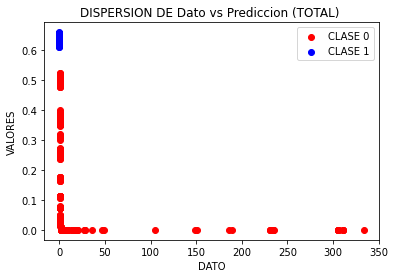

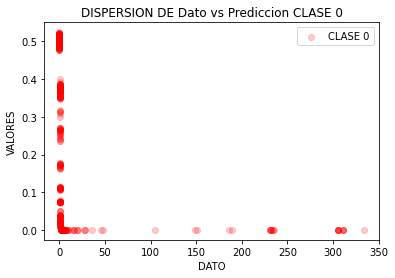

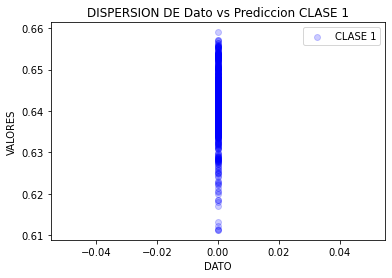

Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


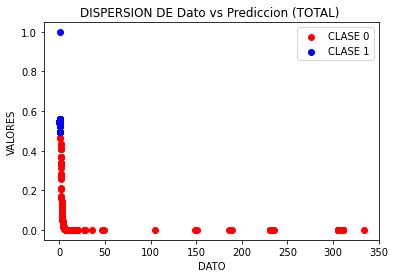

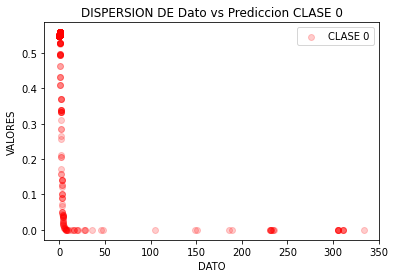

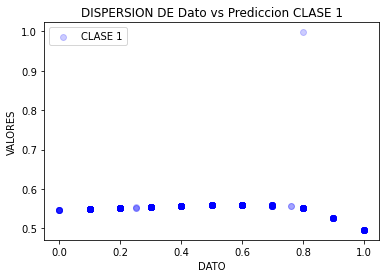

Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


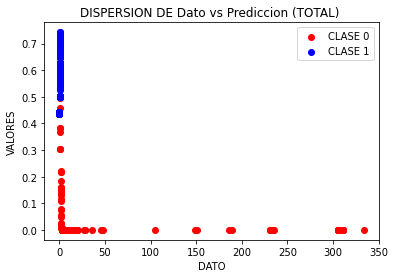

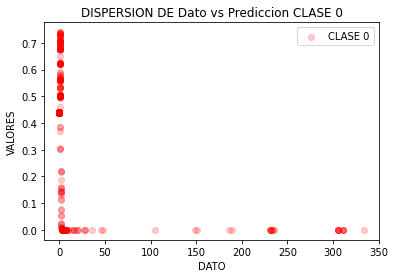

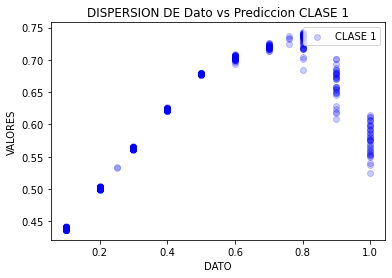

Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


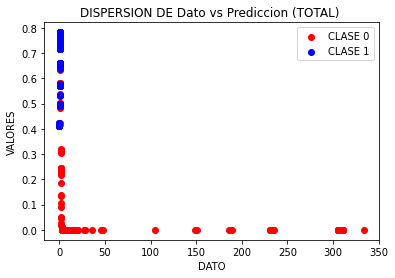

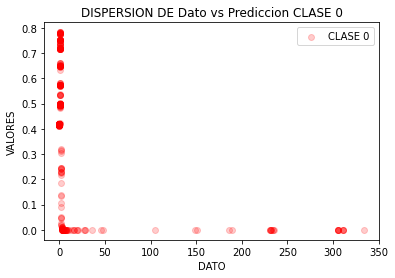

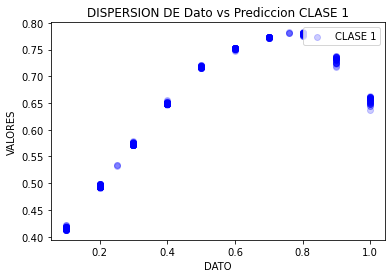

Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


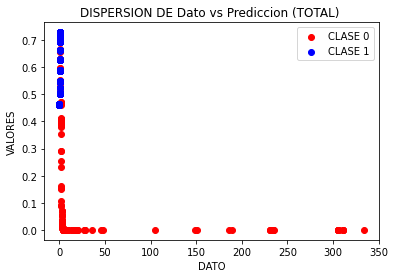

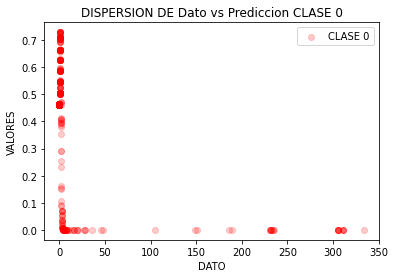

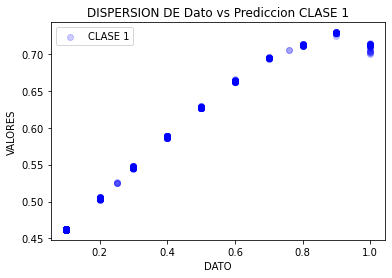

In [15]:
listModelsTrain = testModels(path_base, dfModel[:5], dsTipo='Entrenamiento', verb = 5)

Se encontro dataset Entrenamiento para CLASE
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)
No se encontro resultados en reportes ...procediendo a generar resultados
42/42 [==============================] - 34s 809ms/step


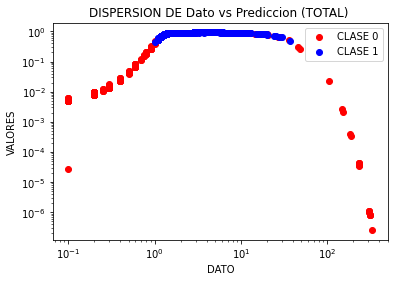

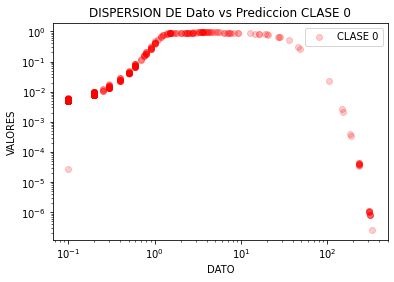

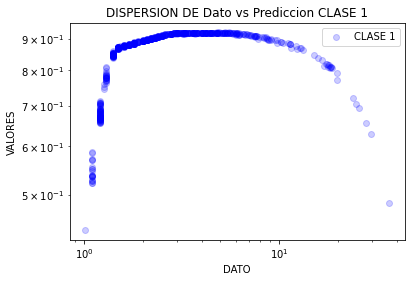

In [37]:
modelo = getModelbyID(path_base, '20220520_115800', dsTipo='Entrenamiento', epoca='19')

Cantidad de modelos a buscar: 1175
INICIANDO PRUEBAS PARA MODELO Regresion\Regresion3D_V2\Dato_V2_TrainDS\Model_07_Regresion_dato_20220509_151148.hdf5
Se encontro dataset Validacion para Dato_V2
Cantidad de pruebas : 2502
Estadisticas para modelo encontrado: Tipo Regresion
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (regresion)
No se encontro resultados en reportes ...procediendo a generar resultados
79/79 [==============================] - 68s 852ms/step


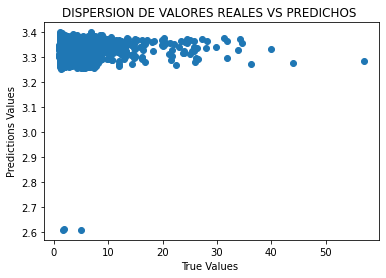

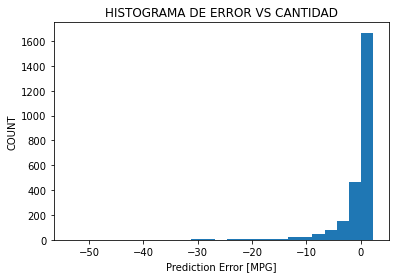

HISTOGRAMA DE DATASET USADO PARA PREDECIR
Cantidad total: 2502
Cantidad ceros: 0


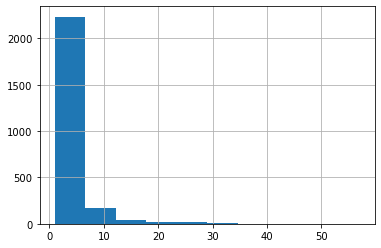

In [30]:
modelo = getModelbyID(path_base, '20220509_151148', dsTipo='Validacion', epoca='07')

Cantidad de modelos a buscar: 1175
INICIANDO PRUEBAS PARA MODELO Clasificacion\Clasificacion3D\CLASE_TrainDS_17\Model_clasificacion_clase_20220427_151059.hdf5
Se encontro dataset Validacion para CLASE
Cantidad de pruebas : 3414
Estadisticas para modelo encontrado: Tipo Clasificacion
Creando modelo 3D
HP :(T:4 - M:30 - C:3) y  tipo (clasificacion)


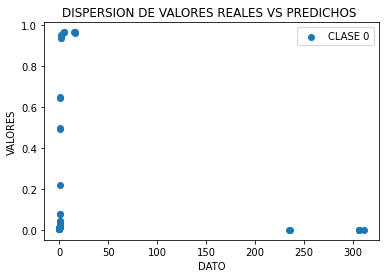

In [31]:
modelo = getModelbyID(path_base, '20220427_151059', dsTipo='Validacion')

CPU times: total: 0 ns
Wall time: 0 ns
Cantidad de modelos a buscar: 251
INICIANDO PRUEBAS PARA MODELO Regresion\Regresion2D_V1\DatoV1_TrainDS\Model_Regresion_dato_20220505_042821.hdf5
Se encontro dataset Validacion para DatoV1
Cantidad de pruebas : 6678
Estadisticas para modelo encontrado: Tipo Regresion
Creando modelo 2D
HP :(T:6 - M:30 - C:2) y  tipo (regresion)
No se encontro resultados en reportes ...procediendo a generar resultados
209/209 [==============================] - 335s 2s/step


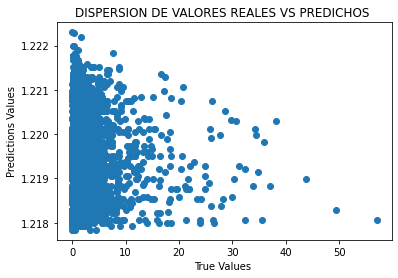

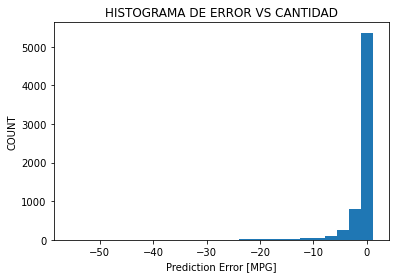

HISTOGRAMA DE DATASET USADO PARA PREDECIR
Cantidad total: 6678
Cantidad ceros: 149


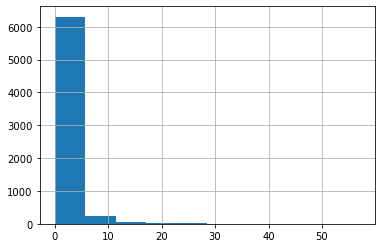

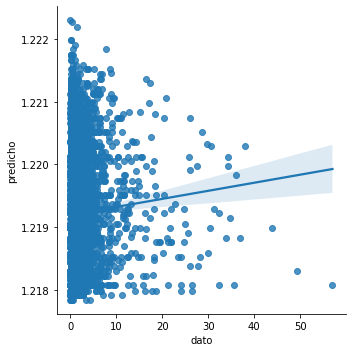

In [147]:
%time
modelo, p_train, hist,  dsPruebas = getModelbyID(path_base, '20220505_042821', dsTipo='Validacion')

CPU times: total: 0 ns
Wall time: 0 ns
Cantidad de modelos a buscar: 251
INICIANDO PRUEBAS PARA MODELO Regresion\Regresion3D_EST\Dato_EST_TrainDS\Model_Regresion_dato_20220503_062223.hdf5
Se encontro dataset Validacion para EST
Cantidad de pruebas : 3577
Estadisticas para modelo encontrado: Tipo Regresion
Creando modelo 3D
HP :(T:6 - M:30 - C:3) y  tipo (regresion)
No se encontro resultados en reportes ...procediendo a generar resultados
112/112 [==============================] - 141s 1s/step


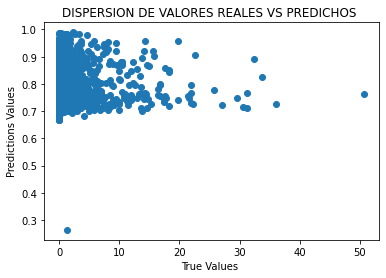

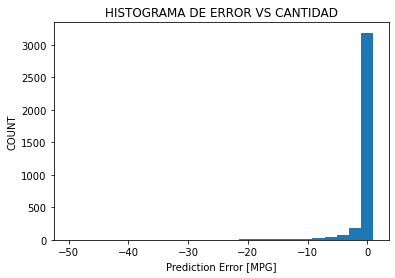

HISTOGRAMA DE DATASET USADO PARA PREDECIR
Cantidad total: 3577
Cantidad ceros: 1872


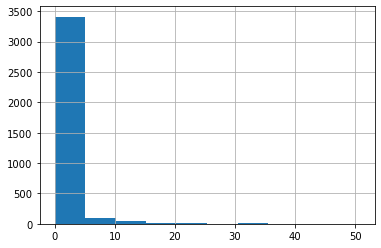

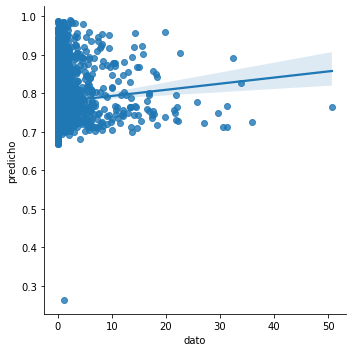

In [148]:
%time
modelo, p_train, hist,  dsPruebas = getModelbyID(path_base, '20220503_062223', dsTipo='Validacion')
